In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import pandas as pd

cancer_df = pd.read_csv("haberman_data1.csv",header=None,names=["age","operation_year","positive_lymph_node","survival_status_after_5years"])
print(cancer_df.head())

   age  operation_year  positive_lymph_node  survival_status_after_5years
0   30              64                    1                             1
1   30              62                    3                             1
2   30              65                    0                             1
3   31              59                    2                             1
4   31              65                    4                             1


In [11]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           306 non-null    int64
 1   operation_year                306 non-null    int64
 2   positive_lymph_node           306 non-null    int64
 3   survival_status_after_5years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


1: there is no null values. 2: no need for imputation.

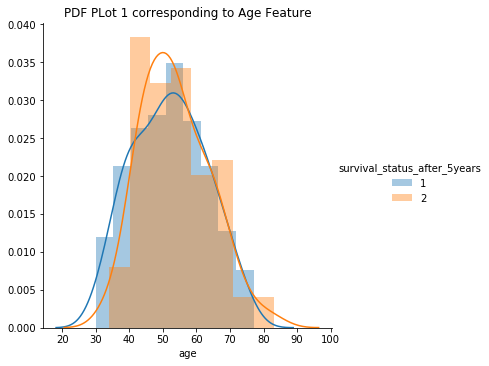

In [15]:
sns.FacetGrid(cancer_df,hue='survival_status_after_5years',height=5).map(sns.distplot,"age").add_legend();
plt.title("PDF PLot 1 corresponding to Age Feature")
plt.show()

1: patients between the age of 40 to 60 are more likely to die. 2: patients less than 40 are more likely to live.

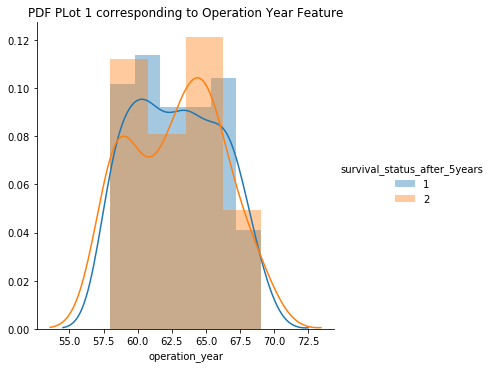

In [16]:
sns.FacetGrid(cancer_df,hue='survival_status_after_5years',height=5).map(sns.distplot,"operation_year").add_legend();
plt.title("PDF PLot 2 corresponding to Operation Year Feature")
plt.show()

1: highly overlapping and age between 60 to 65 died most.

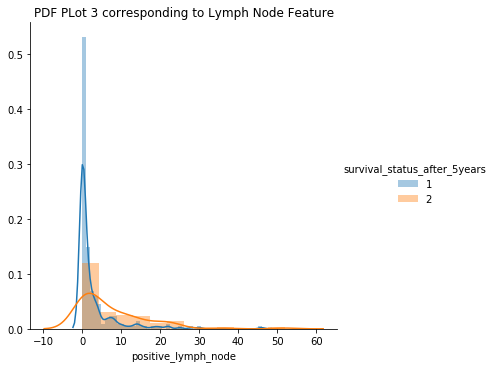

In [17]:
sns.FacetGrid(cancer_df,hue='survival_status_after_5years',height=5).map(sns.distplot,"positive_lymph_node").add_legend();
plt.title("PDF PLot 3 corresponding to Lymph Node Feature")
plt.show()

patient with 0 lymph code will survive.

In [18]:
surv=cancer_df.loc[cancer_df['survival_status_after_5years']==1]
die=cancer_df.loc[cancer_df['survival_status_after_5years']==2]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


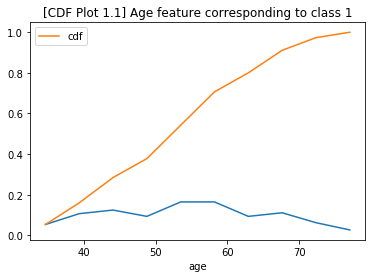

In [27]:
counts,bin_edges=np.histogram(surv['age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],pdf)
plot1,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.title("[CDF Plot 1.1] Age feature corresponding to class 1")
plt.legend([plot1],['cdf'])
plt.show()

1:patient between age of 50 to 60 have greate rate of survival 

2:more than 90% of patient who survived have age less than or equal to 70

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


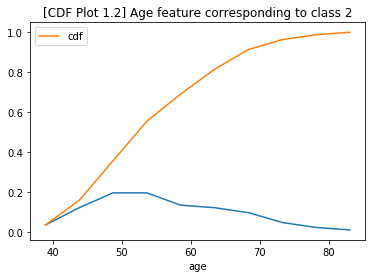

In [30]:
counts,bin_edges=np.histogram(die['age'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],pdf)
plot1,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.title("[CDF Plot 1.2] Age feature corresponding to class 2")
plt.legend([plot1],['cdf'])
plt.show()

around 75% patient who died within 5 years are below the age of 60.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


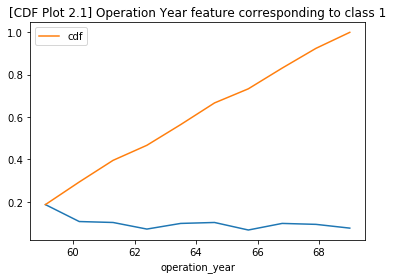

In [29]:
counts,bin_edges=np.histogram(surv['operation_year'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],pdf)
plot1,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('operation_year')
plt.title("[CDF Plot 2.1] Operation Year feature corresponding to class 1")
plt.legend([plot1],['cdf'])
plt.show()

1: around 75% of patients who survived before year 66. 2:surviving rate is declining year by year.

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


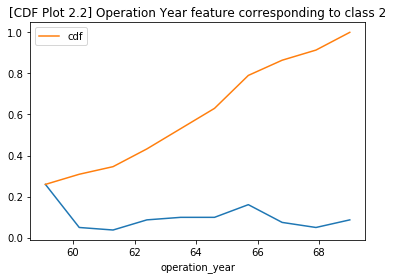

In [32]:
counts,bin_edges=np.histogram(die
                              ['operation_year'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],pdf)
plot1,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('operation_year')
plt.title("[CDF Plot 2.2] Operation Year feature corresponding to class 2")
plt.legend([plot1],['cdf'])
plt.show()

around 88% of patient who undergo surgery died within 5 year before 66

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


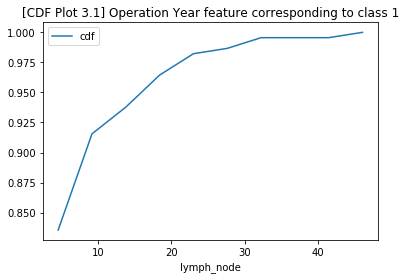

In [35]:
counts,bin_edges=np.histogram(surv['positive_lymph_node'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('lymph_node')
plt.title("[CDF Plot 3.1] Operation Year feature corresponding to class 1")
plt.legend([plot],['cdf'])
plt.show()

90% of patient survived have node less than 10.this implies less the lymph node greater the chance of survival

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


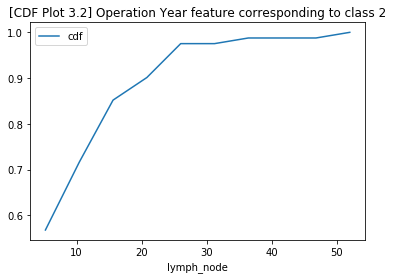

In [36]:
counts,bin_edges=np.histogram(die['positive_lymph_node'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plot,=plt.plot(bin_edges[1:],cdf)
plt.xlabel('lymph_node')
plt.title("[CDF Plot 3.2] Operation Year feature corresponding to class 2")
plt.legend([plot],['cdf'])
plt.show()

around 95% patient die within 5 year of surgery with lymph_node less than or equal to 26.

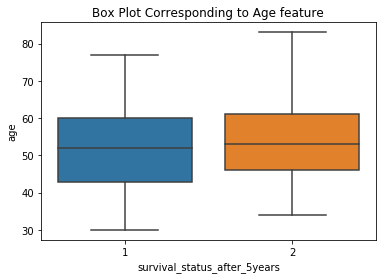

In [42]:
sns.boxplot(x="survival_status_after_5years",y='age',data=cancer_df)
plt.title("Box Plot Using Age feature")
plt.show()

1: it is clear that more than 90% is overlapping with mean and median almost same ,so age feature is not sufficient to find out the exact scenario.

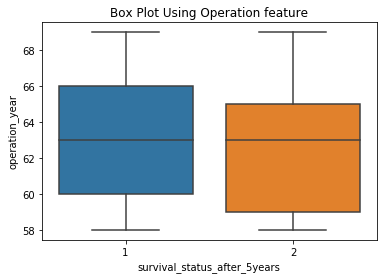

In [43]:
sns.boxplot(x="survival_status_after_5years",y='operation_year',data=cancer_df)
plt.title("Box Plot Using Operation feature")
plt.show()

1: it is clear that more than 80% is overlapping with mean and median almost same ,so age feature is not sufficient to find out the exact scenario.

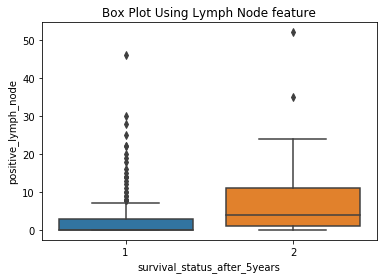

In [44]:
sns.boxplot(x="survival_status_after_5years",y='positive_lymph_node',data=cancer_df)
plt.title("Box Plot Using Lymph Node feature")
plt.show()

1: almost 50% of patient have lymph node less than or equal to 3

2: And Box Plot of Class 1 have outliers.

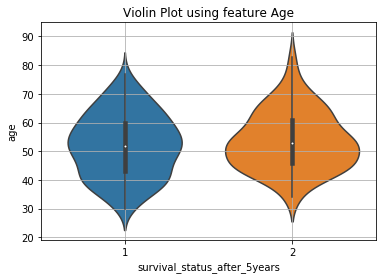

In [47]:
sns.violinplot(x="survival_status_after_5years", y="age", data=cancer_df, size=8)
plt.grid()
plt.title("Violin Plot using feature Age")
plt.show()

1:  Overlapping between class_1 plot and class_2 plot is more than 95%.
2: so, age  feature is not sufficient to interpret

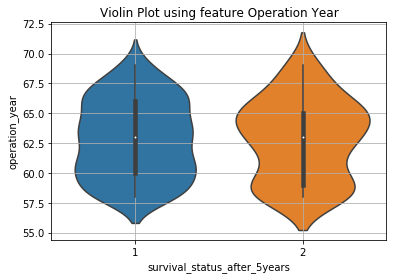

In [49]:
sns.violinplot(x="survival_status_after_5years", y="operation_year", data=cancer_df, size=8)
plt.grid()
plt.title("Violin Plot using feature Operation Year")
plt.show()

1: Overlapping between class_1 plot and class_2 plot is more than 90%. 2: so, operation year feature is not sufficient to interpret

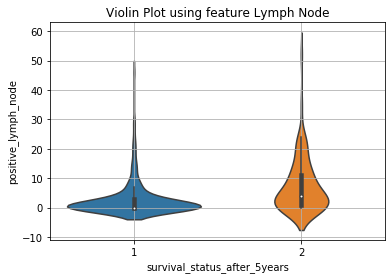

In [50]:
sns.violinplot(x="survival_status_after_5years", y="positive_lymph_node", data=cancer_df, size=8)
plt.grid()
plt.title("Violin Plot using feature Lymph Node")
plt.show()

patient with lymph node equal to 0 will survive. patient whow died have lymph node more than 1 means greater the lymph node greater the chances of dying within 5 years of surgery.

In [52]:
print('Data for Lymph node Feature')
print('Means: ')
print(np.mean(surv['positive_lymph_node']))
print(np.mean(die['positive_lymph_node']))
print("std: ")
print(np.std(surv['positive_lymph_node']))
print(np.std(die['positive_lymph_node']))

Data for Lymph node Feature
Means: 
2.7911111111111113
7.45679012345679
std: 
5.857258449412131
9.128776076761632


1: patient with lymph node greather than or equal to 7 die most of the times. 2: patient who die within 5 year of surgery are more variant in terms of lymph node than patient who survive.

In [54]:
print('Means for Age feature: ')
print(np.mean(surv['age']))
print(np.mean(die['age']))
print('Median for Age feature: ')
print(np.median(surv['age']))
print(np.median(die['age']))

Means for Age feature: 
52.01777777777778
53.67901234567901
Median for Age feature: 
52.0
53.0


1: data is not corrupted as mean and median is same.

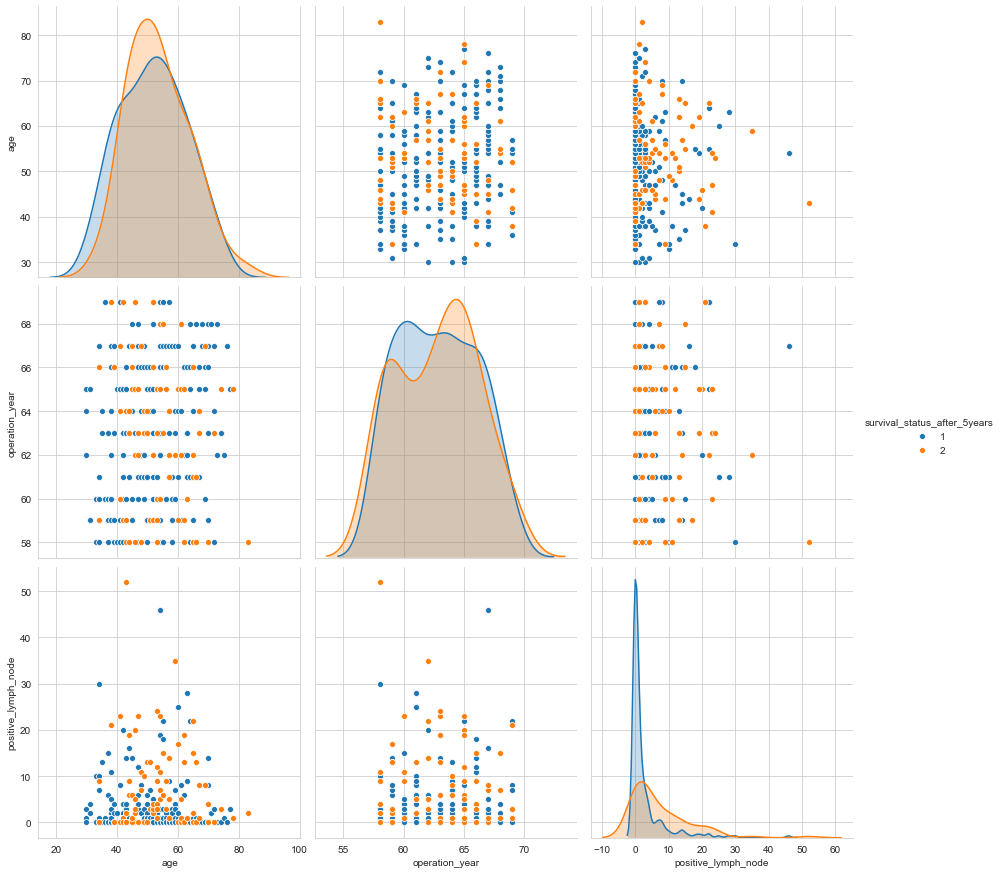

In [51]:
sns.set_style("whitegrid");
sns.pairplot(cancer_df,hue="survival_status_after_5years",height=4);
plt.show()

1: it is difficult to predict using these features.             2: require some more features.        3: lymph node is still better than other two features.              4: order of preference of features should be: lymph_node>operation_year>age

In [ ]:
train = pd.read_csv('train.csv')
features = features.merge(stores,how ='left',on = 'Store')
train = train.merge(features, how ='left', on=['Store', 'Date', 'IsHoliday'])